## Import the wrapper and instantiate it with some untrained models

In [1]:
from analysis import ModelAnalysis
from joblib import dump, load
import torch
from models import SuicideRegressorDrop


## Train the models or load the pretrained stored models

In [2]:
# load nn model
nn_model = SuicideRegressorDrop(in_features=9)
PATH = "torch_models/bn_do.pickle"
saved_state_dict = torch.load(PATH).state_dict()
nn_model.load_state_dict(saved_state_dict)


<All keys matched successfully>

In [3]:
models = {
    'LinearRegression': load('models/linear/linear_default.joblib'),
    'DecisionTreeRegressor': load('models/tree/tree_md_18_ms_4.joblib'),
    # 'MLPRegressor': MLPRegressor(
    #         hidden_layer_sizes=[512, 256, 64, 8],
    #         max_iter=3000,
    #         activation='relu'),
    # 'XGBRegressor': XGBRegressor(),
    'RandomForestRegressor': load('models/forest/forest_ne_30_md_18_ms_2.joblib'),
    'NN': nn_model,
    # 'KNeighborsRegressor': KNeighborsRegressor()
}

model_analysis = ModelAnalysis(models=models)
# train the models
# model_analysis.train()

# here we just load the pretrained ones
# model_analysis.load_models()


In [4]:
# make predictions for all trained models
# the results are stored in the model_analysis class
_ = model_analysis.predict(split='train')
_ = model_analysis.predict(split='val')
_ = model_analysis.predict(split='test')


In [5]:
model_analysis.predictions['test'].keys()

dict_keys(['LinearRegression', 'DecisionTreeRegressor', 'RandomForestRegressor', 'NN'])

## Evaluate the predictions using different metrics

In [6]:
# test other metrics
from sklearn.metrics import (max_error, mean_absolute_error,
                             mean_squared_error, median_absolute_error, r2_score)
from utils import root_mean_squared_error

for metric in [mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error]:
    print(f"{metric.__name__:#^32}")
    _ = model_analysis.evaluate(metric=metric, verbose=True)  # default split is test
    _ = model_analysis.evaluate(metric=metric, split='train', verbose=True)
    print()


#######mean_squared_error#######
LinearRegression: 204.5278734660096
DecisionTreeRegressor: 63.21198259252413
RandomForestRegressor: 17.924398548339347
NN: 15.012826046223426
LinearRegression: 189.94338609477052
DecisionTreeRegressor: 45.15221943849979
RandomForestRegressor: 20.18681065530367
NN: 10.604613698136

####root_mean_squared_error#####
LinearRegression: 14.301324185753206
DecisionTreeRegressor: 7.950596367098768
RandomForestRegressor: 4.233721595516095
NN: 3.874638827842335
LinearRegression: 13.781994996907034
DecisionTreeRegressor: 6.719540121057377
RandomForestRegressor: 4.49297347591811
NN: 3.256472585196442

############r2_score############
LinearRegression: 0.38474592758634574
DecisionTreeRegressor: 0.8098477774382431
RandomForestRegressor: 0.9460804094055966
NN: 0.9548389067619588
LinearRegression: 0.34332356310142254
DecisionTreeRegressor: 0.8438987574742775
RandomForestRegressor: 0.9302097158210236
NN: 0.963337497129259

######mean_absolute_error#######
LinearRegressi

## Visualizations

### Visualize the predicitons

[('LinearRegression', (1.0857950102291696, 8.405870636063353, 9.369700847009497, 9.428444285050372, 10.291780486158865, 12.451808715681814, 24.61723701752831, 29.467821891071523, 4.369184689663969, 20.667003280069043, 8.101618025540798, 22.626429559685825, 20.67247991873151, 22.803070183913583, 28.59787838518746, 12.301502391085457, 12.647417029746226, 12.899137406241223, 9.465301374194446, 7.035165099674749, 7.310384431927945, 20.933033296835845, 10.530766700171952, 28.738470164914716, 17.072408195862124, 19.884369799788313, 20.264583892161813, 30.226301766306964, 6.062992252767467, 29.74841635848012, 1.0303801760717484, -4.267877204475763, 3.759614714365849, 7.2308815393445265, 4.078466605958965, 12.030015760211054, 26.573564586199797, 1.4049018180262713, 17.80051093183819, 2.168266777710418, 12.822009750350366, 6.262482034019208, 9.805389884697053, -5.248464488813362, 18.700832165666647, -6.2763570009868666, 5.1124907590174455, 6.315301847963617, -6.747663440391062, 9.85187798548149

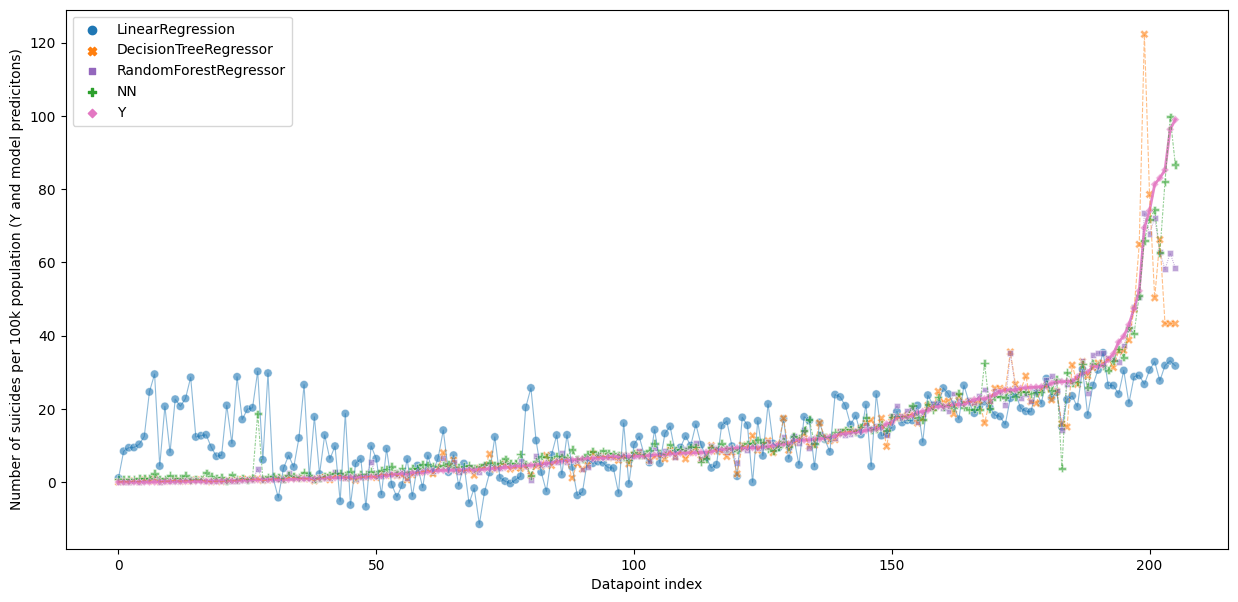

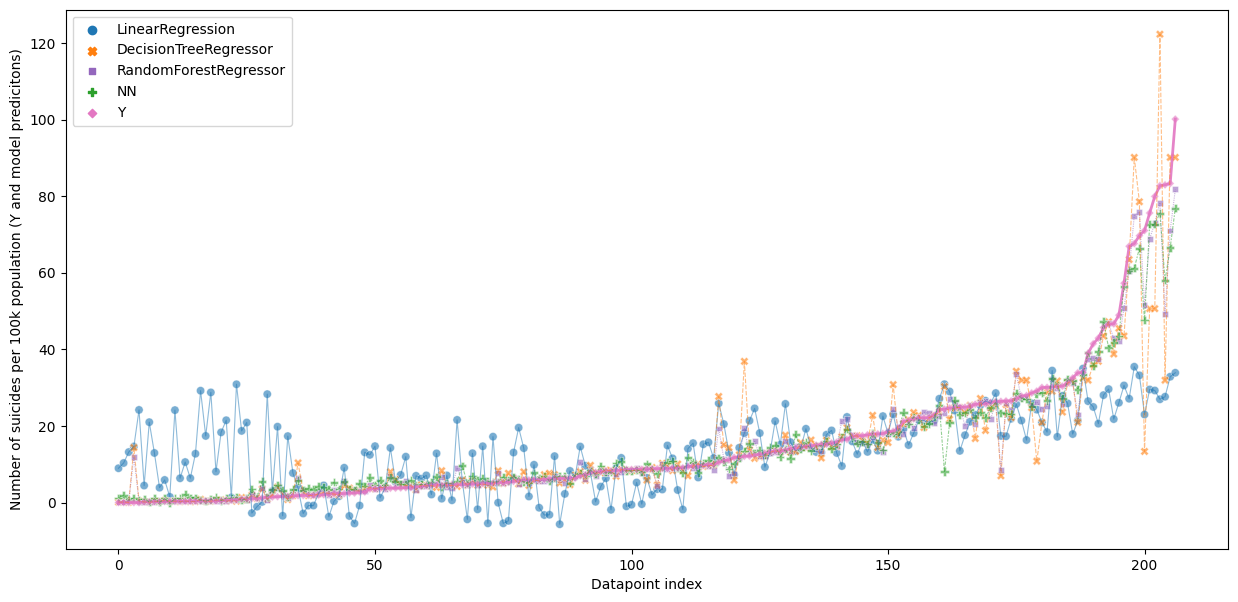

In [18]:
model_analysis.visualize_predictions(sample_range=(0,300),split="val",palette=ModelAnalysis.PALETTE, sort=True)
model_analysis.visualize_predictions(sample_range=(0,300), split='test',palette=ModelAnalysis.PALETTE, sort=True)

### Visualize the accuracies based on different metrics

In [8]:
# # testing
# import math
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns
# import matplotlib.patches as mpatches


# metrics = ModelAnalysis.ALL_METRICS
# num_metrcis = len(metrics)
# ncols = 5
# nrows = math.ceil(num_metrcis / ncols)
# fig, ax = plt.subplots(figsize=(20, 5), nrows=nrows, ncols=ncols)

# for col in range(ncols):
#     for row in range(nrows):
#         index = row*ncols + col
#         if index >= num_metrcis:
#             break
#         metric = metrics[index]
#         scores, min_score = model_analysis.evaluate(
#             metric=metric, split='test')
#         df = pd.DataFrame({
#             'model': model_analysis.models.keys(),
#             'score': scores.values(),
#         })
#         cax = cax = ax[col]  # ax[row][col]
#         sns.barplot(df, x='model', y='score', ax=cax,
#                     palette=ModelAnalysis.PALETTE)
#         cax.set_title(metric.__name__, loc='left')
#         cax.set_xlabel(None)
#         cax.set_xticklabels([])

# patches = [mpatches.Patch(
#     color=model_analysis.PALETTE[m],
#     label=m)
#     for m in model_analysis.models.keys()]
# fig.legend(handles=patches)


[('LinearRegression', (8.948808162108797, 10.312145469785102, 13.171707979334812, 14.626115496091861, 24.176726770646713, 4.4240593715647805, 20.977821680522545, 12.935248763499994, 3.870728156643505, 5.889616431533442, 1.4726334389096962, 24.120095464156975, 6.328231548849597, 10.560870470696361, 6.341905252177387, 12.737980890348348, 29.195496311106965, 17.38225706318675, 28.74817171233652, 8.065343991862719, 18.322535431434705, 21.48079232691112, 1.3150227511304777, 30.871677626993847, 18.698833607919553, 20.885574329293892, -2.7666676291362755, -1.0943733334588206, 0.15400136071488468, 28.29679670058087, 2.9033692594981773, 19.800476701915944, -3.4628101291081137, 17.33596336560136, 7.685445708215663, 3.723052770191684, -2.8679762460198646, -0.8075660786288275, -0.7930995108991805, 2.35909107597303, 4.463308907948665, -3.723254292385281, 0.3408990555353242, 1.6342310282656083, 9.076128494172893, -3.5187981782045696, -5.480587778764779, -0.7947790086934425, 13.093335763977244, 12.44

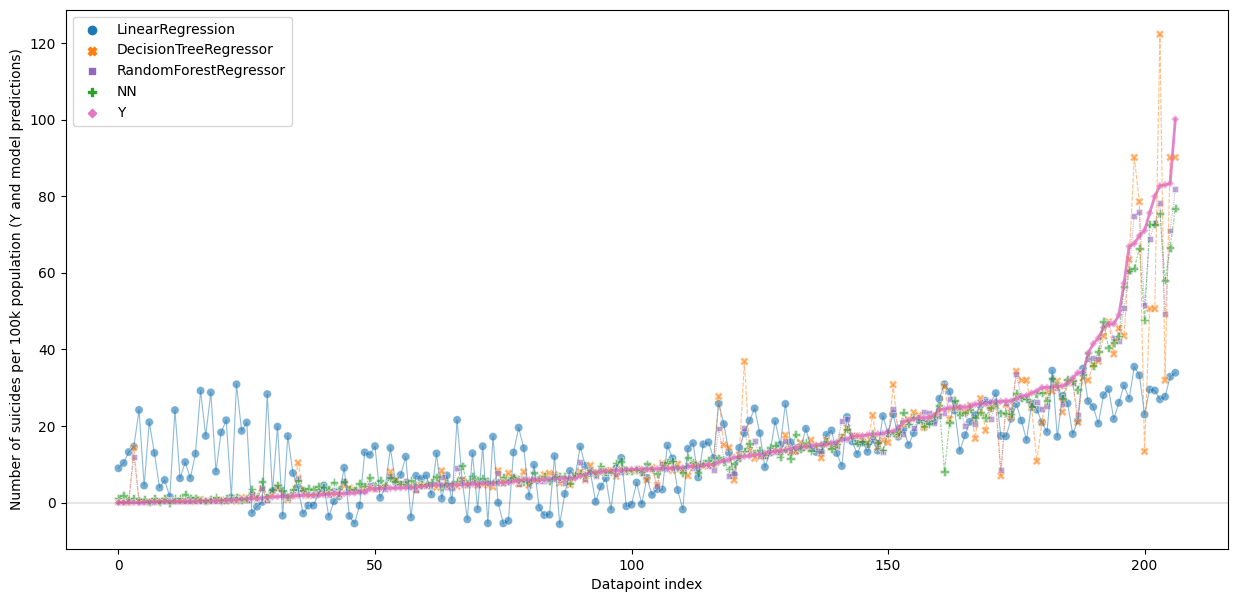

In [24]:
# # testing
# import math
# import pandas as pd
# import matplotlib.pylab as plt
# import seaborn as sns
# import matplotlib.patches as mpatches

# split = 'test'
# sr_start, sr_end = (0,32)


# ##
# pred_keys = model_analysis.predictions[split].keys()
# all_preds = model_analysis.predictions[split].values()
# y = model_analysis.splits[split]['y']
# sorted_preds = sorted(zip(y,*all_preds))
# y_sorted, *all_preds_sorted = zip(*sorted_preds)
# print(list(zip(pred_keys,all_preds_sorted)))


# ##
# preds_subset = {k: preds
#                 for k, preds in zip(pred_keys,all_preds_sorted)}
# # map tensor to float
# preds_subset['NN'] = list(map(lambda x: x.item(), preds_subset['NN']))
# # print(preds_subset['NN'])
# preds_subset['Y'] = y_sorted

# for k, v in preds_subset.items():
#     print(k, len(v))
# pred_df = pd.DataFrame(preds_subset)

# fig, ax = plt.subplots(figsize=(15, 7))
# ax.set_xlabel('Datapoint index')
# ax.set_ylabel(
#     'Number of suicides per 100k population (Y and model predictions)')
# sns.scatterplot(pred_df, markers=True, alpha=.6,
#                 ax=ax, palette=model_analysis.PALETTE)
# sns.lineplot(pred_df.Y, alpha=.9, ax=ax,
#                 color=model_analysis.Y_COLOR, linewidth=2, legend=False)
# sns.lineplot(pred_df[[k for k in model_analysis.models.keys() if k != 'Y']],
#                 alpha=.5, ax=ax, palette=model_analysis.PALETTE, linewidth=.8, legend=False)
# ax.axhline(c='black', alpha=.1)

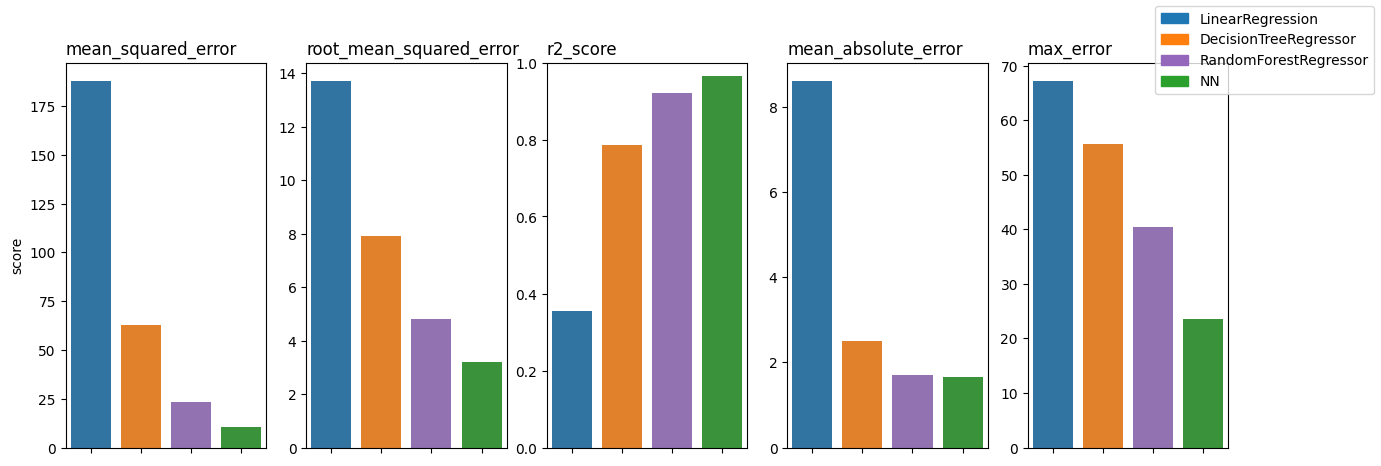

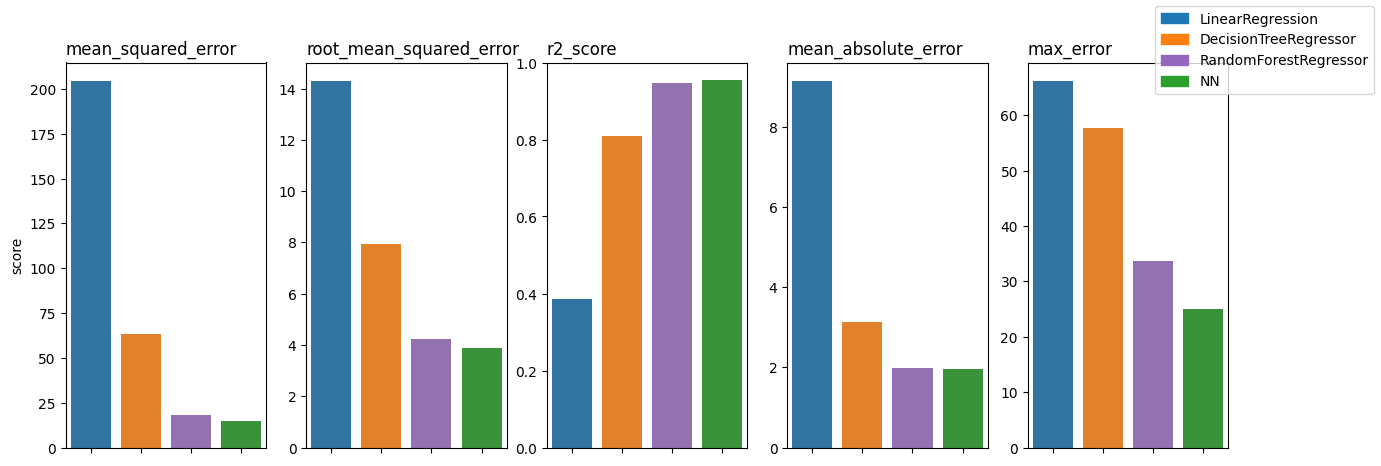

In [10]:
model_analysis.visualize_metrics(split='val',palette=ModelAnalysis.PALETTE, ncols=5)
model_analysis.visualize_metrics(split='test',palette=ModelAnalysis.PALETTE, ncols=5)

## We can save the models to a file to reuse them later without having to retrain them

In [11]:
# model_analysis.save_models()